# Layered Network

##### Imports

In [50]:
# Custom Modules
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', 'modules')))
from hh_model import HodgkinHuxleyNeuron

# Standard Modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Poly3DCollection

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

### Single Network

##### Directed Erdos-Renyi Graph

In [51]:
def generate_erdos_renyi_digraph(n, p, s=''):
    # Create an empty directed graph
    G = nx.DiGraph()
    
    # Add nodes with custom names
    names = [s + str(i) for i in range(n)]
    for name in names:
        G.add_node(name)  # Assuming HodgkinHuxleyNeuron() is defined elsewhere
    
    # Add edges based on Erdos-Renyi probability
    for i, u in enumerate(names):
        for j, v in enumerate(names):
            if i != j and random.random() < p:
                G.add_edge(u, v)
    
    # Remove bidirectional edges
    for u, v in list(G.edges()):
        if G.has_edge(v, u):
            G.remove_edge(v, u)
    
    # Create neuron objects
    for node in G.nodes():
        G.nodes[node]['neuron'] = HodgkinHuxleyNeuron()
    
    return G

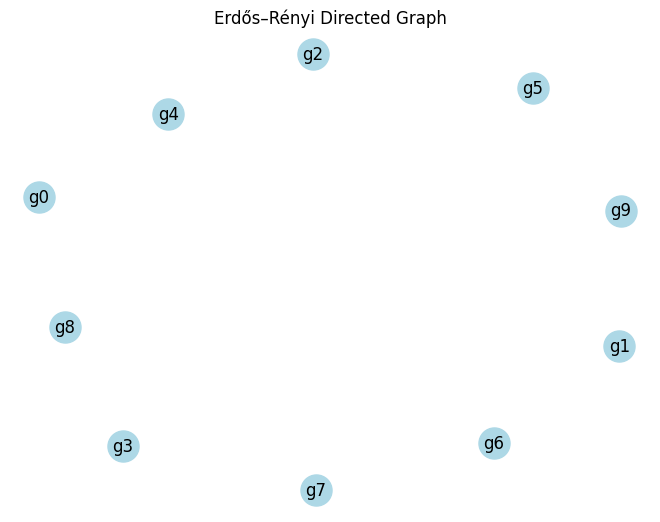

{'g0': [], 'g1': [], 'g2': [], 'g3': [], 'g4': [], 'g5': [], 'g6': [], 'g7': [], 'g8': [], 'g9': []}


In [ ]:
g = generate_erdos_renyi_digraph(10, 0, s='g')

# Draw the graph
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
plt.title("Erdős–Rényi Directed Graph")
plt.show()


# Parameters
T = 15.0
dt = 0.01
time = np.arange(0, T, dt)

I_inp = np.zeros(len(time))
I_inp[int(0/dt):int(0.5/dt)] = 15.0
I_inp[0] = 0

# Record data
V_record = {}
nodes = g.nodes()
for node in nodes:
        V_record[node] = []

Network = g.nodes()
for i in enumerate(time):
    for node in Network:
        neuron = Network[node]['neuron']
        neuron.step(dt, I_inp[i])
        V_record[node].append(neuron.V)



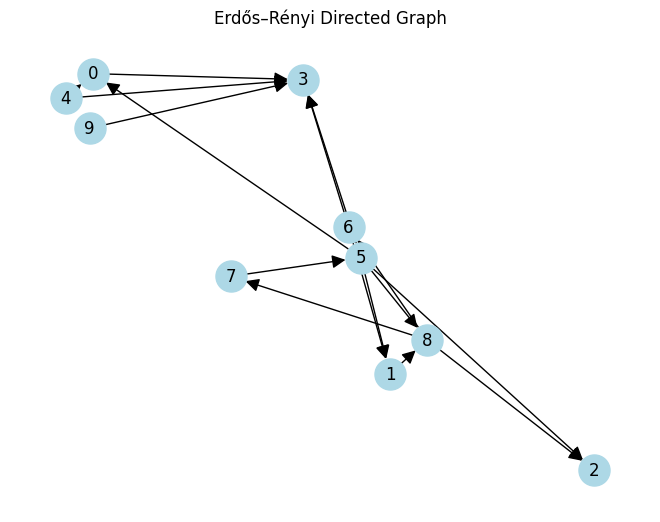

In [52]:
# Parameters
n = 10
p = 0.3

# Generate the graph
digraph = generate_erdos_renyi_digraph(n, p)

# Draw the graph
pos = nx.spring_layout(digraph)
nx.draw(digraph, pos, with_labels=True, node_color='lightblue', node_size=500, arrowsize=20)
plt.title("Erdős–Rényi Directed Graph")
plt.show()

In [53]:
print(digraph.nodes()['0'])

{'neuron': <hh_model.HodgkinHuxleyNeuron object at 0x7b74d17c2020>}


##### Layered Network

{'h0': [], 'h1': [], 'h2': [], 'h3': [], 'h4': [], 'h5': [], 'h6': [], 'h7': [], 'h8': [], 'h9': [], 'g0': [], 'g1': [], 'g2': [], 'g3': [], 'g4': []}
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7
h8
h9
g0
g1
g2
g3
g4
h0
h1
h2
h3
h4
h5
h6
h7


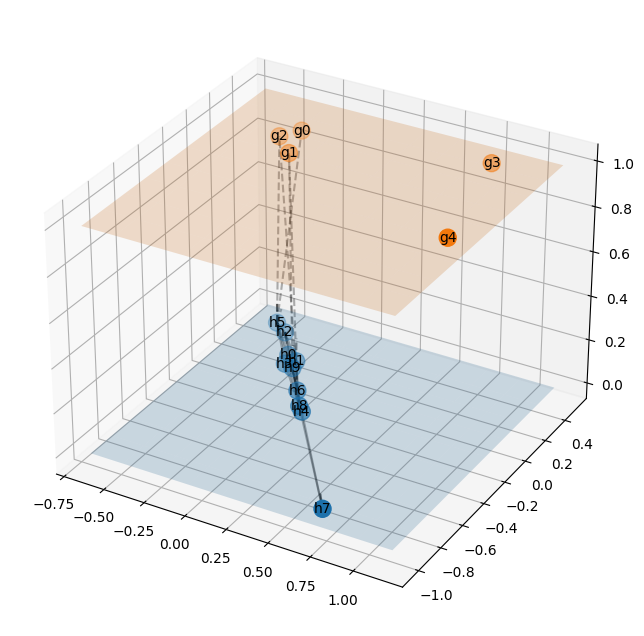

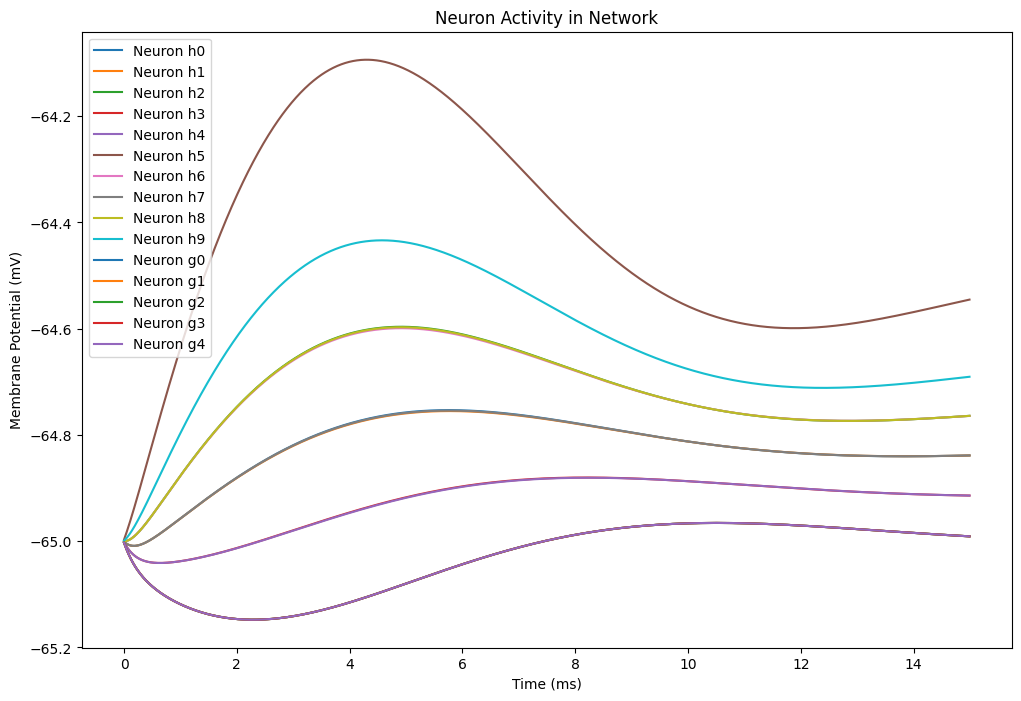

In [58]:
class LayeredNetworkGraph(object):

    def __init__(self, graphs, inter_prob=0.0, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.inter_prob = inter_prob
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []

        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])

        self.update = {}
        for g in self.graphs:
            self.update[g]= list(g.nodes())
                
        

    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])

    def get_edges_between_layers(self):
        """Forms connections between nodes from different layers, thus connecting the layers"""
        self.edges_between_layers = []
        for z1, h in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            g = self.graphs[z2]

            h_nodes = list(h.nodes())

            for node1 in g.nodes():
                for node2 in h_nodes:
                    if random.random() < self.inter_prob:
                        h.add_node(node1)
                        h.nodes[node1]['neuron'] = g.nodes[node1]['neuron']
                        h.add_edge(node1, node2)
                        self.edges_between_layers.append(((node1, z2), (node2, z1)))


    def get_node_positions(self, *args, **kwargs):
        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        # Hardcoded arrow size
        arrow_size = 0.1  # Control the size of the arrowhead here
        
        # Extract color from kwargs if it's passed
        color = kwargs.get('color', 'blue')  # Default to 'blue' if not provided
        
        # Remove 'color' from kwargs to avoid conflict
        kwargs = {key: value for key, value in kwargs.items() if key != 'color'}

        for source, target in edges:
            # print((source, target)) 
            start = self.node_positions[source]
            end = self.node_positions[target]

            # Calculate direction vector
            direction = np.array(end) - np.array(start)  
            length = np.linalg.norm(direction)
            direction /= length  # Normalize direction

            # Set up the quiver to draw arrows
            self.ax.quiver(start[0], start[1], start[2], 
                           direction[0], direction[1], direction[2], 
                           length=length, color=color, 
                           arrow_length_ratio=arrow_size, *args, **kwargs)

    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, *args, **kwargs):
        for node, z in self.nodes:
            ax.text(*self.node_positions[(node, z)], node, *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=150, zorder=3)

        self.draw_node_labels(horizontalalignment='center',
                              verticalalignment='center',
                              zorder=100)

    def run(self):
        # Parameters
        T = 15.0
        dt = 0.01
        time = np.arange(0, T, dt)

        I_inp = np.zeros(len(time))
        I_inp[int(0/dt):int(0.5/dt)] = 15.0
        I_inp[0] = 0

        # Post-Synaptic Constants
        tau = 30
        weight = 0.1
        
        V_record = {}
        for nodes in self.update.values():  # Iterate over the lists of nodes in self.update
            for node in nodes:
                V_record[node] = []
    
        first_done = 0
        print(V_record)
        
        for i in range(len(time)):
            for network in self.graphs[::-1]:
                Network = network.nodes()
                nodes = self.update[network]

                for node in nodes:
                    print(node)
                    neuron = Network[node]['neuron']
                    I_temp = 0.0

                    if first_done:
                        for pred in list(network.predecessors(node)):
                            parent = Network[pred]['neuron']
                            I_temp += weight * np.exp(-(neuron.V - parent.V) / tau)
                        
                        neuron.step(dt, I_temp)
                        V_record[node].append(neuron.V)
                    else:
                        neuron.step(dt, I_inp[i])
                        V_record[node].append(neuron.V)
                        first_done = 1

                #     if node in range(len(Network) - 1):
                #         neuron.step(dt, I_inp[i])
                #         V_record[node].append(neuron.V)
                #     else:
                #         for pred in list(network.predecessors(node)):
                #             parent = Network[pred]['neuron']
                #             I_temp += weight * np.exp(-(neuron.V - parent.V) / tau)
                
                #         neuron.step(dt, I_temp)
                #         V_record[node].append(neuron.V)


                # for node in g.nodes():
                #     n_obj = g.nodes()[node]
                    
                #     if n_obj:
                #         n_obj['neuron'].step(dt, I_inp[i])


        # Plotting results
        plt.figure(figsize=(12, 8))
        for nodes in self.update.values():
            for node in nodes:
                plt.plot(time, V_record[node], label=f'Neuron {node}')
        plt.legend()
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mV)")
        plt.title("Neuron Activity in Network")
        plt.show()

if __name__ == '__main__':
    n = 10
    g = generate_erdos_renyi_digraph(int(n/2), p=0, s='g')
    h = generate_erdos_renyi_digraph(n, p=0.3, s='h')
    prob_inter = 0.1

    # initialise figure and plot
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    obj = LayeredNetworkGraph([g, h][::-1], prob_inter, ax=ax, layout=nx.spring_layout)
    obj.run()
    # ax.set_axis_off()
    plt.show()